# COVID temperature vs cases in Poland

In this exercise, it will be analized if there exists a correlation between the average temperature and the number of COVID-19 cases in Poland.

The time frame for this analysis will be between the 1st of January of 2021 till the 25th of December of 2021. 

The tool that will be utilized to analize will be a heatmap from the seaborn library comparing the correlation between this two variables. 

First, I imported all necessary libraries for the analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

The information about COVID-19 cases was found in github and added to this notebook as a dataframe. 
This dataframe contains information from all the countries. Information found in dataframe is:


*   Contry/Region
*   Confirmed cases
*   Confirmed cases
*   Cumulative cases
*   Deaths
*   Cumulative deaths

The shape of this dataframe is (199640, 6).



In [ ]:
url = 'https://raw.githubusercontent.com/datasets/covid-19/main/data/time-series-19-covid-combined.csv'
df = pd.read_csv(url)

First, the columns were renamed for better analysis

In [ ]:
df.rename(columns={'Country/Region': 'Country', 'Confirmed': 'Cumul_Cases', 'Deaths': 'Cumul_Deaths'}, inplace=True)

Secondly, results were filtered to show only Poland and Mexico.
I decided to take Mexico to compared it to Poland. 

In [ ]:
#Filter example
#Symbol | works as 'or' and symbol & works as 'and'
#filter = (df['Country/Region'] == 'Mexico') | (df['Country/Region'] == 'Poland')
filter_mex = (df['Country'] == 'Mexico')
filter_pol = (df['Country'] == 'Poland')

After filtering the countries, I removed the unnecessary columns and kept only the country, the cumulative cases, the cumulative deaths and the date. 

In [ ]:
df_mex = df.loc[filter_mex, ['Country', 'Cumul_Cases', 'Cumul_Deaths', 'Date']]
df_pol = df.loc[filter_pol, ['Country', 'Cumul_Cases', 'Cumul_Deaths', 'Date']]

After filtering the culumns, I decided to use the Date as an index for this analysis

In [ ]:
df_mex = df_mex.set_index('Date')
df_pol = df_pol.set_index('Date')

As I had the cumulative cases per day and I wanted to know the cases per day instead, I created the column Daily cases to handle this information

In [ ]:
df_mex['Daily_cases'] = df_mex['Cumul_Cases'].diff()
df_pol['Daily_cases'] = df_pol['Cumul_Cases'].diff()
df_mex['Daily_deaths'] = df_mex['Cumul_Deaths'].diff()
df_pol['Daily_deaths'] = df_pol['Cumul_Deaths'].diff()

With the daily cases in the database and the date as an Index, I proceded to create a plot to compare the COVID-19 cases in Mexico and in Poland and another graph with the deaths in this countries. 

With this graphs, I concluded that, even if they both have very similar number of cases, the death rate in Mexico is much higher than in Poland. 

The average of deaths for people with positive COVID-19 result is approximately 8% in Mexico and only 3.6% in Poland.

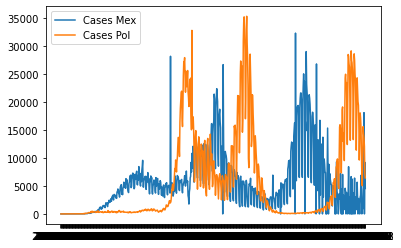

In [ ]:
plt.plot(df_mex['Daily_cases'], label='Cases Mex')
plt.plot(df_pol['Daily_cases'], label='Cases Pol')
plt.legend()
plt.show()

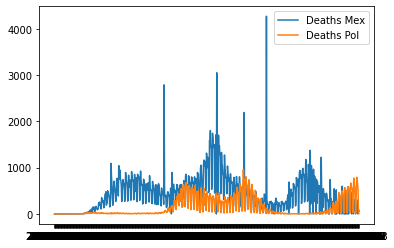

In [ ]:
plt.plot(df_mex['Daily_deaths'], label='Deaths Mex')
plt.plot(df_pol['Daily_deaths'], label='Deaths Pol')
plt.legend()
plt.show()

In [ ]:
print((df_mex['Daily_deaths']/df_mex['Daily_cases']).median())
print((df_pol['Daily_deaths']/df_pol['Daily_cases']).median())

0.0763554700032082
0.02145922746781116


In [ ]:
print((df_mex['Daily_deaths'].sum()/df_mex['Daily_cases'].sum()))
print((df_pol['Daily_deaths'].sum()/df_pol['Daily_cases'].sum()))

0.075017829132803
0.02361018817562607


After analyzing the cases and deaths in Mexico and Poland, I decided to test the main question of this laboratory, which is:

**Is there any correlation between the temperature and COVID-19 cases in Poland?**
For this task, I downloaded an excel file with the minimum, maximum and average temperatures in Poland per day. For this study, the most important is the average temperature of the day.

In [ ]:
df_temp = pd.read_excel('temperatures.xlsx')

First, as in the COVID-19 dataframe, I set the date as the Index to compare this variables

In [ ]:
df_temp = df_temp.set_index('date')

I established a time frame for both of them. From the 1st of January of 2021 till the 25th of December of 2021.

In [ ]:
df_pol_wave = df_pol.loc['2021-01-01':'2021-12-25']
#df_temp_wave = df_temp.loc['2021-01-01':'2021-12-25']

In [ ]:
df_mex_wave = df_mex.loc['2021-01-01':'2021-12-25']

In [ ]:
print((df_mex_wave['Daily_deaths'].sum()/df_mex_wave['Daily_cases'].sum()))
print((df_pol_wave['Daily_deaths'].sum()/df_pol_wave['Daily_cases'].sum()))

0.06852010177068633
0.02392288446895213


Here is the plot showing the number of COVID-19 cases in Poland in the selected time frame.

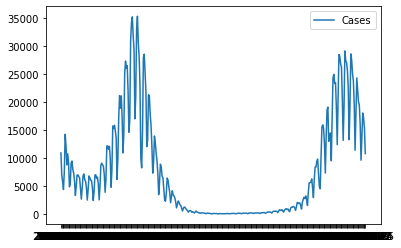

In [ ]:
plt.plot(df_pol_wave['Daily_cases'], label='Cases')
plt.legend()
plt.show()

Here is the graph of the average temperatures in Poland in the desire time frame.

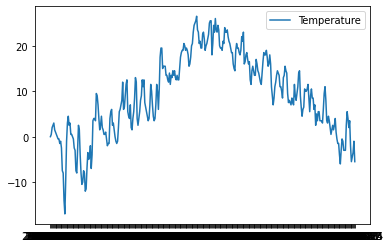

In [ ]:
plt.plot(df_temp_wave['av'], label='Temperature')
plt.legend()
plt.show()

Then, I created a scatter plot showing this two variables together.

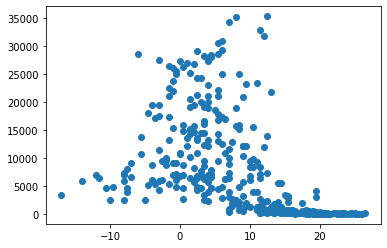

In [ ]:
plt.scatter(df_temp_wave['av'], df_pol_wave['Daily_cases'])

To finish the comparison with a correlation matrix, I created a 3rd data frame with the Average temperature per day in Poland and the Daily cases as columns.

In [ ]:
df_corr = df_temp_wave['av']

In [ ]:
df_corr = df_corr.to_frame()

In [ ]:
df_corr['Daily_cases'] = df_pol_wave['Daily_cases']

I created with seaborn a heatmap showing how this two variables correlate.

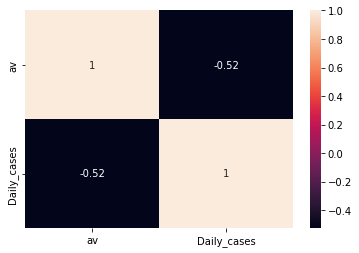

In [ ]:
sns.heatmap(df_corr.corr(), annot=True)

In conclusion, there is a negative correlation between the Average temperature per day in Poland and the COVID-19 Daily Cases in Poland. 

This means that as the temperature gets lower, the COVID-19 cases get higher with a correlation factor of -0.52. This is just taking into account information from this last 2021 year. 